In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from cluster_optimizer import ClusterOptimizer

import pandas as pd

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans,HDBSCAN

from sklearn.preprocessing import PowerTransformer,OneHotEncoder

from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


import seaborn as sns



In [3]:
# load data
data = load_iris()
df_iris = pd.DataFrame(data['data'],columns=data['feature_names'])
df_iris['target'] = data['target'] 

target_map   = dict([x for x in enumerate(data['target_names'])])
target_map_r = dict([(x[1],x[0]) for x in enumerate(data['target_names'])]) 

# pipeline for preprocessing
feature_names = data['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# pipeline for preprocessing
feature_names = data['feature_names']

numeric_features = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'] # feature_names
numeric_transformer = Pipeline(
    steps=[
        ('encoder', PowerTransformer(standardize=True)),
        ]
    )

categorical_features = []
categorical_transformer = Pipeline(
    steps=[
         ('encoder', OneHotEncoder(handle_unknown='ignore')),
         ]
    )

# combine transformers into pipeline
preprocessor = ColumnTransformer(
    transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features),
        ]
    )

# transform data
iris_trans = preprocessor.fit_transform(df_iris[feature_names])   


In [5]:
# setup different cluster setting
cluster_settings = {
    'kmeans': {
        'clusterer': KMeans(),
        'params':{
                    'n_clusters':                      [2,3,4,5,6,7,8,9,10],
                    'init':                            ['k-means++', 'random'],
                    }
                },
    'hDBScan': {
        'clusterer': HDBSCAN(),
        'params':{
                    'min_cluster_size':          [2,3,4,5,6,50],
                    'min_samples':               [3,5,10,15,20,25,50],
                    'cluster_selection_epsilon': [0.25,0.5,0.75],
                    }
                },
            }


In [6]:
# cluster all parameters
cluster_method = 'kmeans'

# set up ClusterOptimizer
co = ClusterOptimizer(
    cluster_settings[cluster_method]['clusterer'],
    cluster_settings[cluster_method]['params'],
    scoring=[silhouette_score, davies_bouldin_score, calinski_harabasz_score]
    )

# run
co.optimize(iris_trans)
# print top results
display(co.results.sort_values('silhouette_score',ascending=False))


,cluster_method,cluster_param__init,cluster_param__n_clusters,silhouette_score,davies_bouldin_score,calinski_harabasz_score
0,KMeans,k-means++,2,0.587311,0.585648,259.895044
1,KMeans,random,2,0.587311,0.585648,259.895044
2,KMeans,k-means++,3,0.460279,0.834723,245.684111
3,KMeans,random,3,0.457197,0.840909,246.786555
4,KMeans,k-means++,4,0.426422,0.901770,214.499125
5,KMeans,random,4,0.426422,0.901770,214.499125
7,KMeans,random,5,0.353698,0.939208,209.161415
6,KMeans,k-means++,5,0.343607,0.964669,208.738726
17,KMeans,random,10,0.342927,0.877300,173.964002
8,KMeans,k-means++,6,0.339726,0.955711,185.694204


<Axes: >

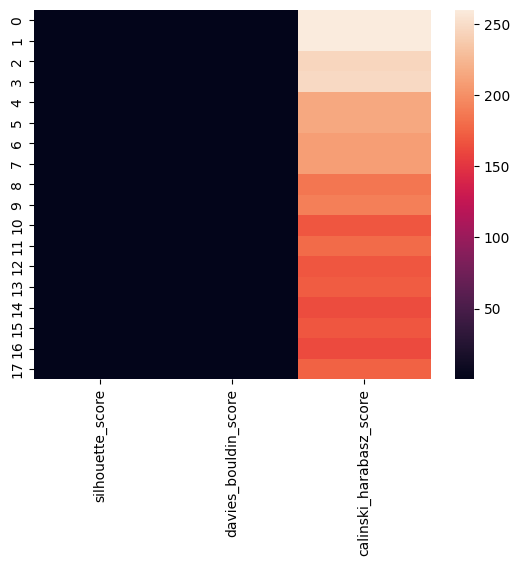

In [7]:
sns.heatmap(data=co.results[['silhouette_score', 'davies_bouldin_score', 'calinski_harabasz_score']])

In [8]:
# cluster all parameters
cluster_method = 'hDBScan'

# set up ClusterOptimizer
co = ClusterOptimizer(
    cluster_settings[cluster_method]['clusterer'],
    cluster_settings[cluster_method]['params'],
    scoring=[silhouette_score, davies_bouldin_score, calinski_harabasz_score]
    )

# run
co.optimize(iris_trans)


In [11]:
# print top results
display(co.results.sort_values('silhouette_score',ascending=False).head(30))


,cluster_method,cluster_param__cluster_selection_epsilon,cluster_param__min_cluster_size,cluster_param__min_samples,silhouette_score,davies_bouldin_score,calinski_harabasz_score
100,HDBSCAN,0.50,6,25,0.611963,0.542826,302.330409
101,HDBSCAN,0.75,6,25,0.611963,0.542826,302.330409
15,HDBSCAN,0.25,2,25,0.611963,0.542826,302.330409
38,HDBSCAN,0.75,3,25,0.611963,0.542826,302.330409
78,HDBSCAN,0.25,5,25,0.611963,0.542826,302.330409
37,HDBSCAN,0.50,3,25,0.611963,0.542826,302.330409
80,HDBSCAN,0.75,5,25,0.611963,0.542826,302.330409
36,HDBSCAN,0.25,3,25,0.611963,0.542826,302.330409
16,HDBSCAN,0.50,2,25,0.611963,0.542826,302.330409
17,HDBSCAN,0.75,2,25,0.611963,0.542826,302.330409
